Importing necessary ibraries for our project.

In [438]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [408]:
!pip install yfinance

Declaring an array for all the cryptocurrencies under study.

In [409]:
crypto_array = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'USDC-USD', 'BNB-USD']
crypto_array

['BTC-USD', 'ETH-USD', 'USDT-USD', 'USDC-USD', 'BNB-USD']

In [439]:
# Declaring an empty dictionary for storing seperate dataframes for each cryptocurrency.
df = {}

In [440]:
import yfinance as yf
import datetime as dt

start = dt.datetime(2019,1,1)
end = dt.datetime.now()

for i in crypto_array:
    df[i] = yf.download(i, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [441]:
# Accessing BTC dataframe.
df["BTC-USD"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748


In [413]:
df["BTC-USD"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1245 entries, 2019-01-01 to 2022-06-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1245 non-null   float64
 1   High       1245 non-null   float64
 2   Low        1245 non-null   float64
 3   Close      1245 non-null   float64
 4   Adj Close  1245 non-null   float64
 5   Volume     1245 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.1 KB


In [414]:
df["BTC-USD"].Close.isna().unique()
df["ETH-USD"].Close.isna().unique()
df["USDT-USD"].Close.isna().unique()
df["USDC-USD"].Close.isna().unique()
df["BNB-USD"].Close.isna().unique()

array([False])

### Visualizations relative to closing price of each cryptocurrency.

Text(0.02, 0.95, 'BTC-USD')

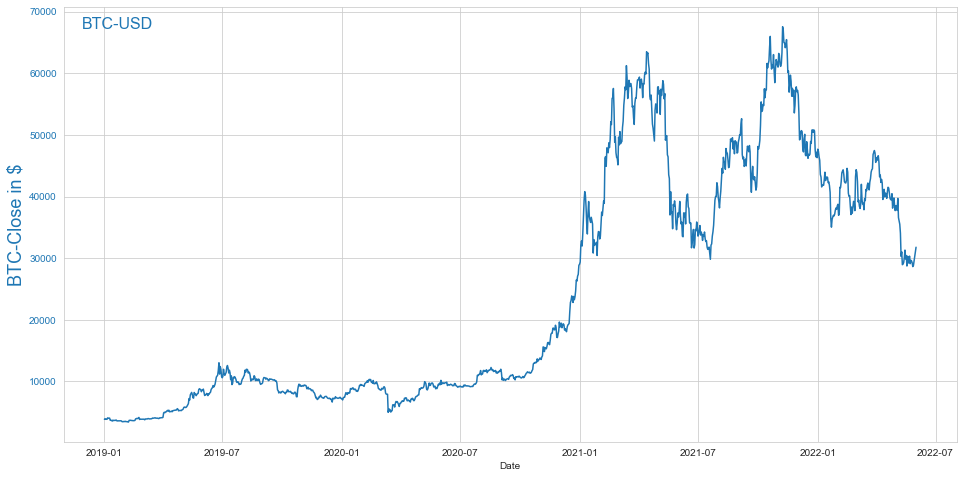

In [424]:
import matplotlib.pyplot as plt 
import matplotlib.colors as col 
from matplotlib import cm
x = df['BTC-USD'].index
fig, ax1 = plt.subplots(figsize=(16, 8), sharex=False)
color = 'tab:blue'
y = df["BTC-USD"]['Close']
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC-Close in $', color=color, fontsize=18)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.text(0.02, 0.95, 'BTC-USD',  transform=ax1.transAxes, color=color, fontsize=16)

Similarly we can create graphs for each of our other coins including Ethereum, Tether, Binance Coin, and USD Coin.

Text(0.02, 0.95, 'BNB-USD')

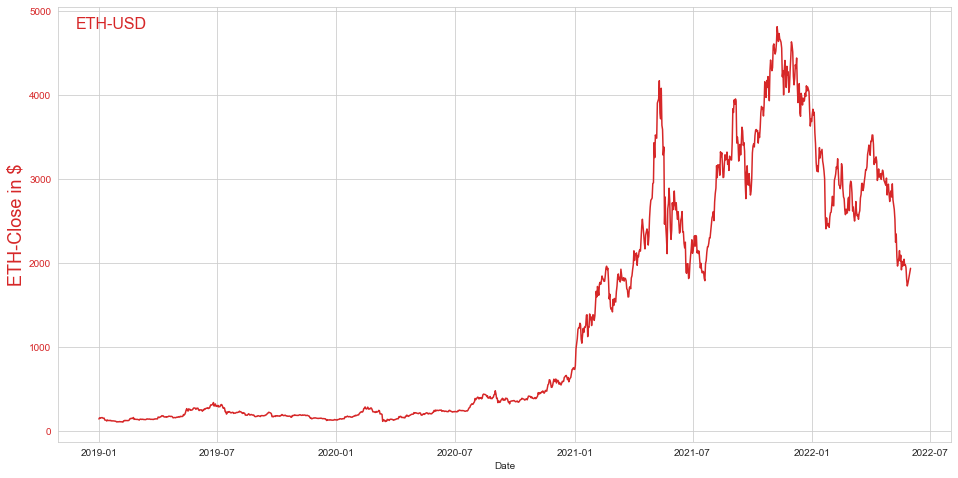

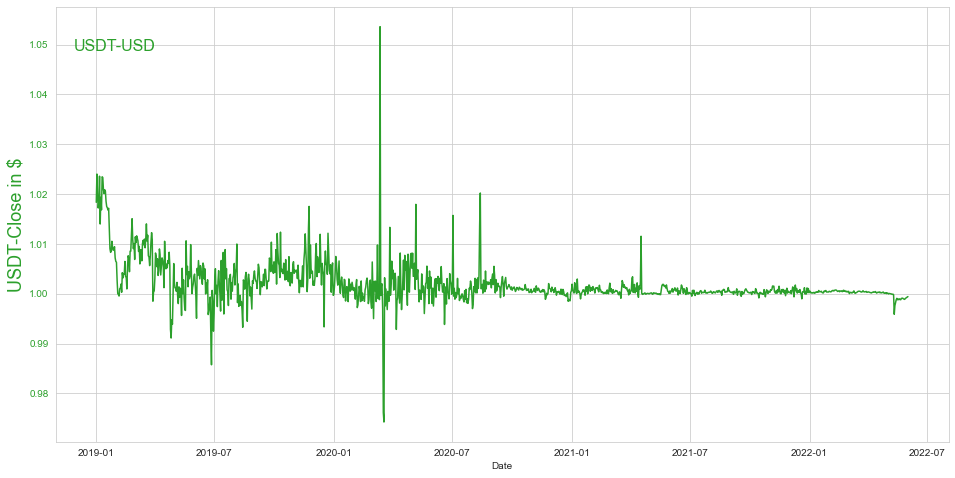

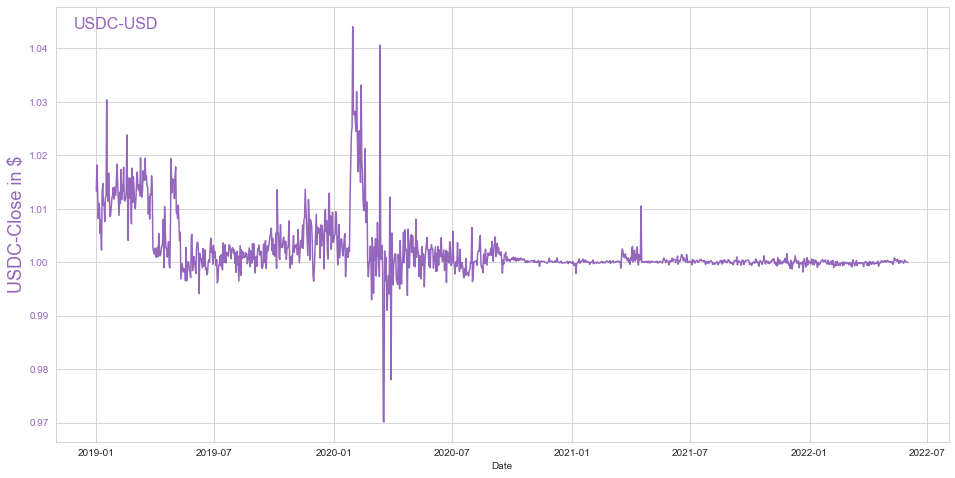

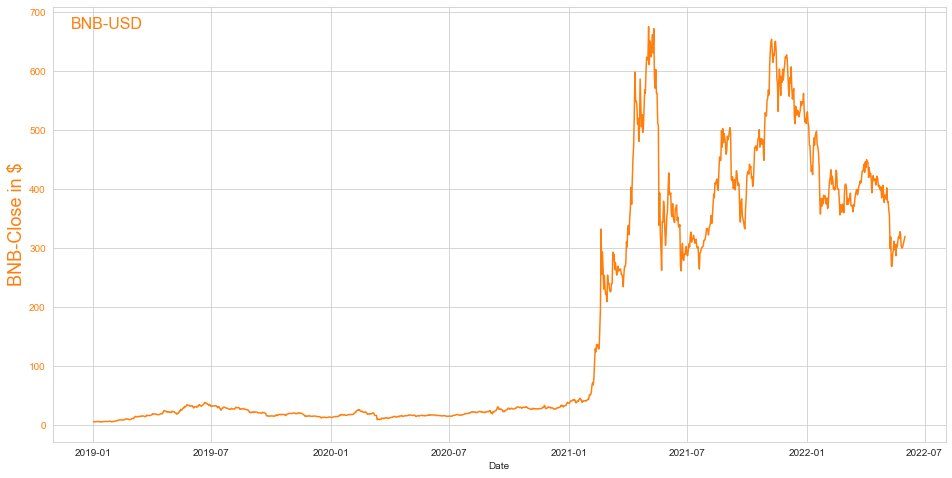

In [433]:
x = df["ETH-USD"].index
fig, ax2 = plt.subplots(figsize=(16, 8), sharex=False)
color = 'tab:red'
y = df["ETH-USD"]['Close']
ax2.set_xlabel('Date')
ax2.set_ylabel('ETH-Close in $', color=color, fontsize=18)
ax2.plot(x, y, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.text(0.02, 0.95, 'ETH-USD',  transform=ax2.transAxes, color=color, fontsize=16)

x = df["USDT-USD"].index
fig, ax3 = plt.subplots(figsize=(16, 8), sharex=False)
color = 'tab:green'
y = df["USDT-USD"]['Close']
ax3.set_xlabel('Date')
ax3.set_ylabel('USDT-Close in $', color=color, fontsize=18)
ax3.plot(x, y, color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.text(0.02, 0.90, 'USDT-USD',  transform=ax3.transAxes, color=color, fontsize=16)

x = df["USDC-USD"].index
fig, ax4 = plt.subplots(figsize=(16, 8), sharex=False)
color = 'tab:purple'
y = df["USDC-USD"]['Close']
ax4.set_xlabel('Date')
ax4.set_ylabel('USDC-Close in $', color=color, fontsize=18)
ax4.plot(x, y, color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax4.text(0.02, 0.95, 'USDC-USD',  transform=ax4.transAxes, color=color, fontsize=16)

x = df["BNB-USD"].index
fig, ax5 = plt.subplots(figsize=(16, 8), sharex=False)
color = 'tab:orange'
y = df["BNB-USD"]['Close']
ax5.set_xlabel('Date')
ax5.set_ylabel('BNB-Close in $', color=color, fontsize=18)
ax5.plot(x, y, color=color)
ax5.tick_params(axis='y', labelcolor=color)
ax5.text(0.02, 0.95, 'BNB-USD',  transform=ax5.transAxes, color=color, fontsize=16)

### Training a Random Forest Regressor Model for our data.

In [ ]:
def pricePred(data):
    
    parameters = {
        "test_size": 0.25,
        "random_state": 1,
    }
    
    X = data.drop(["Close", "Volume"], axis = 1)
    y = data.Close
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = parameters["test_size"], random_state = parameters["random_state"])
        
    regressor = RandomForestRegressor()
    regressor.fit(X_train,y_train)
    
    y_pred = regressor.predict(X_test)
    mean_err = mean_absolute_error(y_test, y_pred)
    print("Prediction Score :",regressor.score(X_test,y_test))
    
    print("Mean Absolute Error :", mean_err)
    
    plt.plot(y_test, y_pred, "*")
    plt.ylabel('Predicted closing price')
    plt.xlabel('Actual closing price')
    plt.title("{} closing price prediction".format(data))
    plt.show()
    
    
    return regressor

Prediction Score : 0.999883236786752
Mean Absolute Error : 68.1757357788086


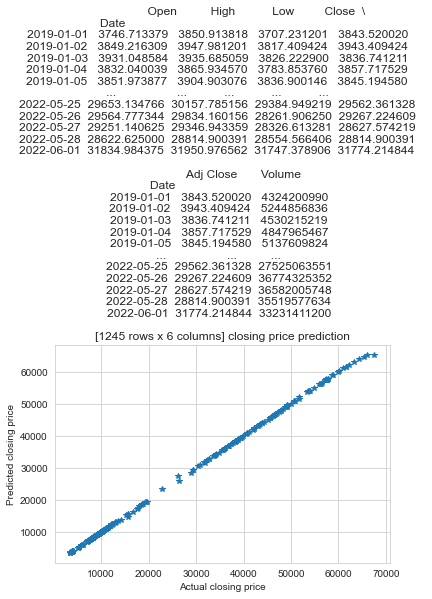

RandomForestRegressor()

In [379]:
pricePred(df['BTC-USD'])

Similarly, for other coins:

Prediction Score : 0.9999387732347115
Mean Absolute Error : 4.25108893687909


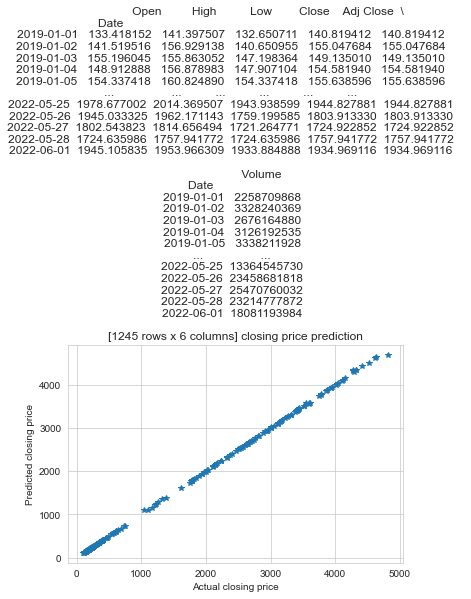

RandomForestRegressor()

In [434]:
pricePred(df['ETH-USD'])

Prediction Score : 0.9996228340611536
Mean Absolute Error : 2.1531692682171083e-05


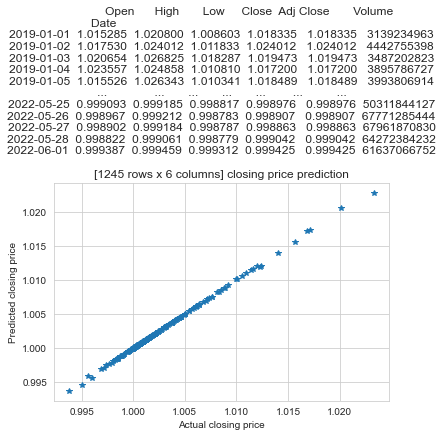

RandomForestRegressor()

In [435]:
pricePred(df['USDT-USD'])

Prediction Score : 0.9970943665194044
Mean Absolute Error : 4.97251978287332e-05


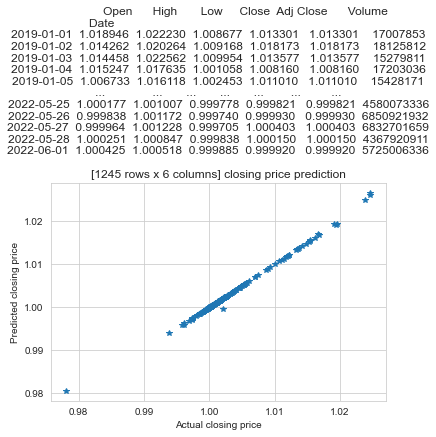

RandomForestRegressor()

In [436]:
pricePred(df['USDC-USD'])

Prediction Score : 0.9999482397404266
Mean Absolute Error : 0.5200420109125282


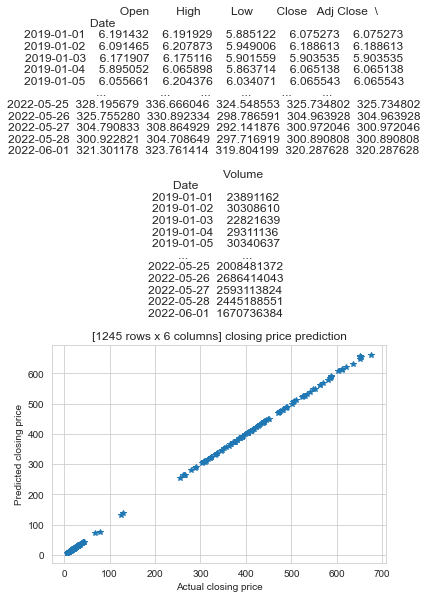

RandomForestRegressor()

In [437]:
pricePred(df['BNB-USD'])

Hence, our project is succesful in delivering a mean 99% accuracy for all the cryptocurrencies under study in this project.